## Clustering Assignment

### Problem Statement:
 -  Choosing the countries that are in the direst need of aid depending upon the socio-economic and health factors.
#### Steps:
 - 1. Reading and understanding the data.
 - 2. Data quality check.
 - 3. EDA: Univariate and Bivariate Analysis
 - 4. Cleaning the data.
 - 5. Outlier Analysis and Treatment.
 - 6. Hopkins Statistics.
 - 7. Scaling the data.
 - 8. SSD/Elbow curve.
 - 9. Silhouette Analysis.
 - 10. K-means Clustering.
 - 11. Visualizing with Scatter plots.
 - 12. Cluster Profiling.
 - 13. Hierarchical Clustering.

 

In [993]:
import warnings
warnings.filterwarnings('ignore')

In [994]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1. Reading and understanding the data

In [995]:
# Reading the data set
country_data=pd.read_csv("C:\\Users\\ANUSMITA\\Documents\\jupyter_python\\Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [996]:
country_data["country"].value_counts()

Netherlands    1
Mali           1
Guyana         1
Germany        1
Lithuania      1
              ..
Lesotho        1
Colombia       1
Bangladesh     1
France         1
Malta          1
Name: country, Length: 167, dtype: int64

In [997]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [998]:
country_data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [999]:
country_data.shape ## to check the number of rows and columns of the dataset

(167, 10)

In [1000]:
len(list(country_data['country'].unique()))

167

### 2. Data Quality Check:

In [1001]:
## Data quality check for 'exports'
country_data['exports']=country_data['exports']*country_data['gdpp']/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1002]:
## Data quality check for 'imports'
country_data['imports']=country_data['imports']*country_data['gdpp']/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,7185.800,19100,1.44,76.8,2.13,12200


In [1003]:
## Data quality check for 'health'
country_data['health']=country_data['health']*country_data['gdpp']/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### 3. EDA: Univariate and Bivariate Analysis:

In [1004]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [1005]:
col=list(country_data.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [1006]:
col=col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

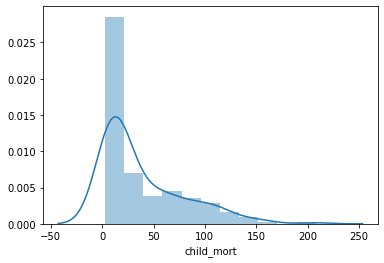

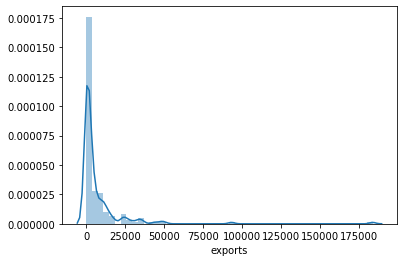

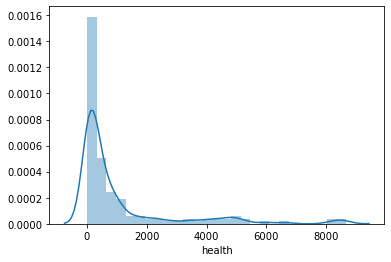

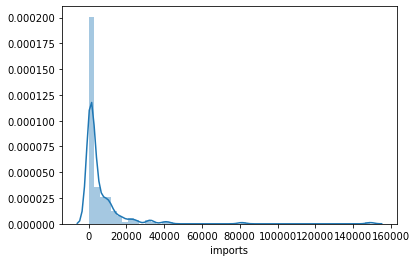

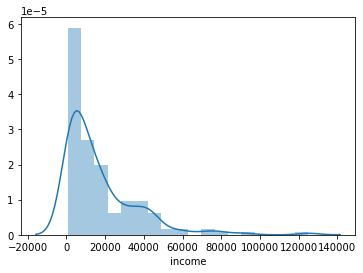

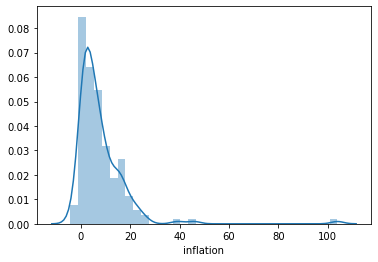

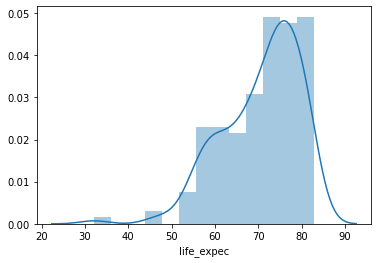

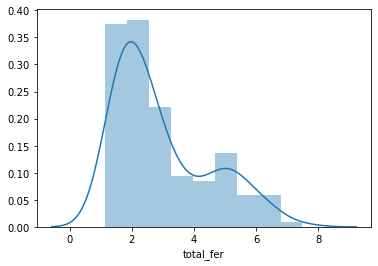

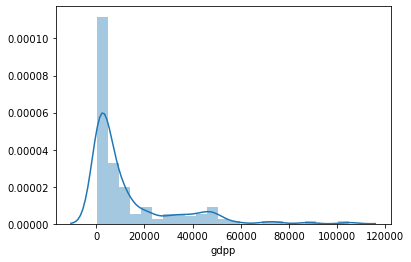

In [1007]:
# Distribution of the columns: distplot()

for c in col:
    sns.distplot(country_data[c])
    plt.show();


In [1008]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1009]:
country_data[col].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1010]:
country_data[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


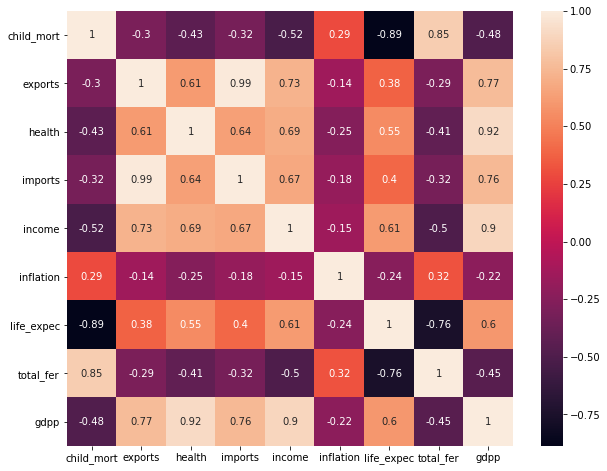

In [1011]:
plt.figure(figsize=(10,8))
sns.heatmap(country_data[col].corr(), annot=True)
plt.show()

#### Visualising the Numerical Variables:

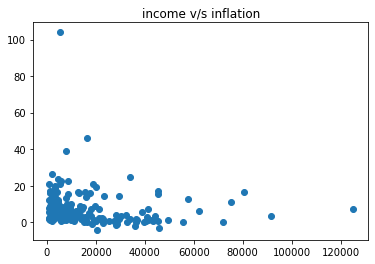

In [1012]:
## income v/s inflation
plt.scatter(data=country_data,x='income',y='inflation')
plt.title("income v/s inflation")
plt.show()

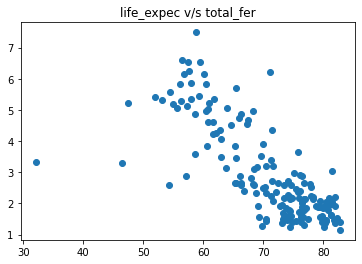

In [1013]:
## life_expec v/s total_fer
plt.scatter(data=country_data,x='life_expec',y='total_fer')
plt.title("life_expec v/s total_fer")
plt.show()

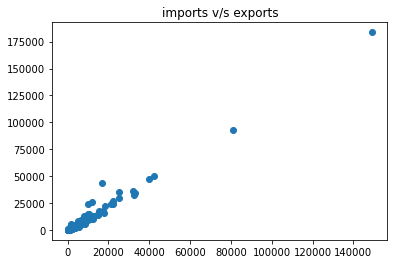

In [1014]:
## imports v/s exports
plt.scatter(data=country_data,x='imports',y='exports')
plt.title("imports v/s exports")
plt.show()

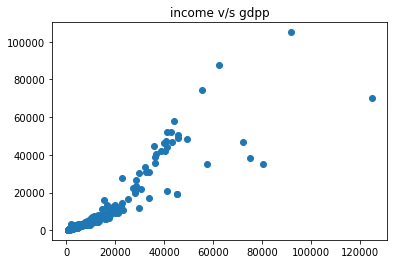

In [1015]:
## income v/s gdpp
plt.scatter(data=country_data,x='income',y='gdpp')
plt.title("income v/s gdpp")
plt.show()

#### Inference: We see no Linear relationship between the variables.

#### Visualising the categorical relationship:

<Figure size 1440x1440 with 0 Axes>

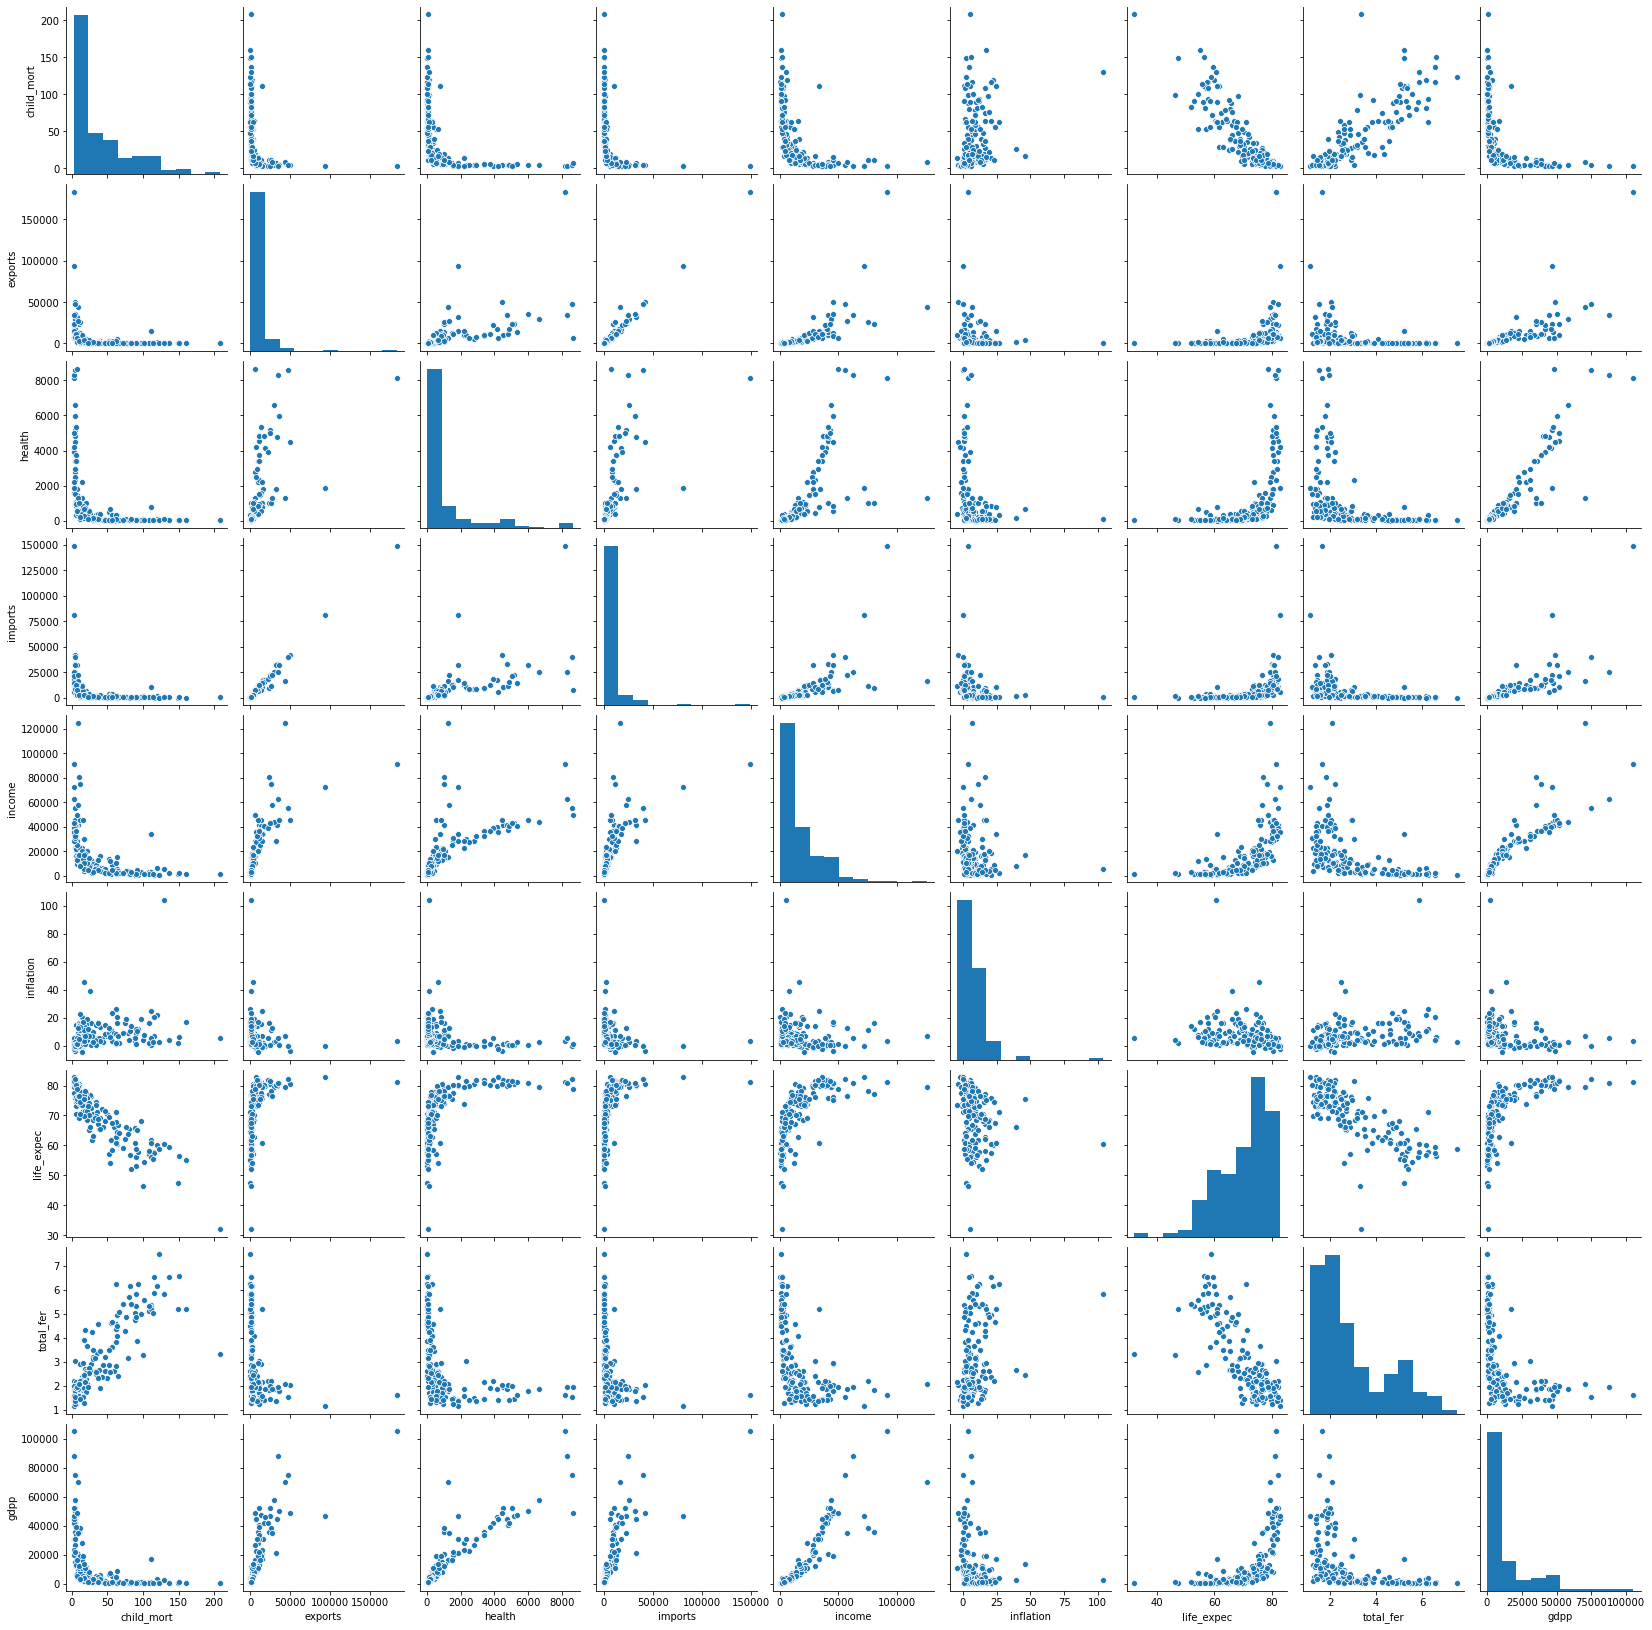

In [1016]:
## to see the relationship between all the variables
plt.figure(figsize=[20,20])
sns.pairplot(data=country_data)
plt.show()

#### Inference: We observe that there is no Linear relationship between the variables. Therefore, we have to cluster the data to perform clustering.

### 4. Cleaning the data

In [1017]:
# Checking for missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Inference : There are no columns with null values.

In [1018]:
## Dropping the rows having missing values
country_data=country_data.dropna()
country_data.shape

(167, 10)

#### Inference: There are no rows with missing values

### 5. Outlier Analysis and Treatment:

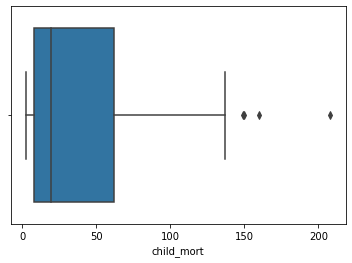

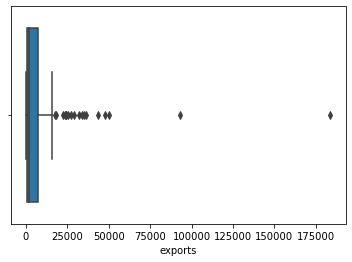

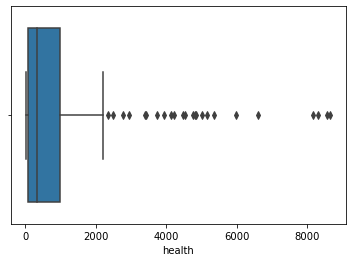

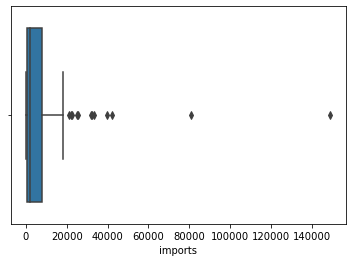

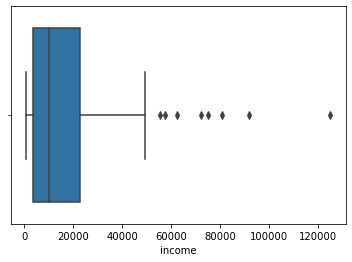

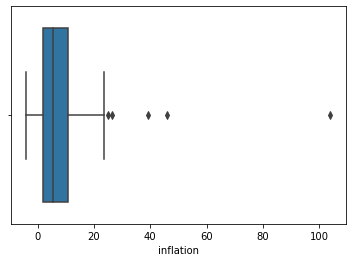

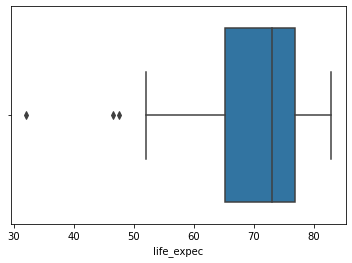

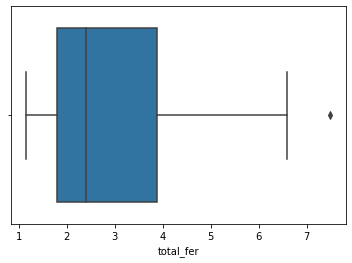

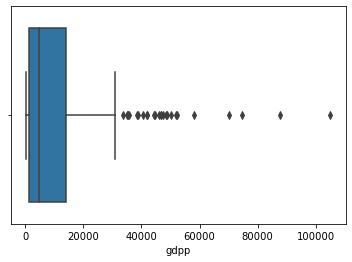

In [1019]:
for c in col:
    sns.boxplot(country_data[c])
    plt.show();

In [1020]:
## Outlier treatment
q1=country_data['child_mort'].quantile(0.01)
q2=country_data['inflation'].quantile(0.01)
q3=country_data['total_fer'].quantile(0.01)

print(q1,q2,q3)

2.8 -2.3487999999999998 1.2431999999999999


In [1021]:
q4 = country_data['exports'].quantile(0.99)
q5 = country_data['health'].quantile(0.99)
q6 = country_data['imports'].quantile(0.99)
q7 = country_data['income'].quantile(0.99)
q8 = country_data['gdpp'].quantile(0.99)

print(q4,q5,q6,q7,q8)

64794.26000000014 8410.3304 55371.39000000013 84374.00000000003 79088.00000000004


In [1022]:
country_data['child_mort'][country_data['child_mort']<=q1] = q1
country_data['inflation'][country_data['inflation']<=q2] = q2
country_data['total_fer'][country_data['total_fer']<=q3] = q3

country_data['exports'][country_data['exports']>=q4] = q4
country_data['health'][country_data['health']>=q5] = q5
country_data['imports'][country_data['imports']>=q6] = q6
country_data['income'][country_data['income']>=q7] = q7
country_data['gdpp'][country_data['gdpp']>=q8] = q8

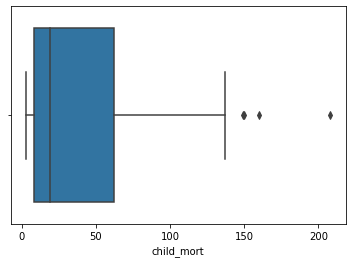

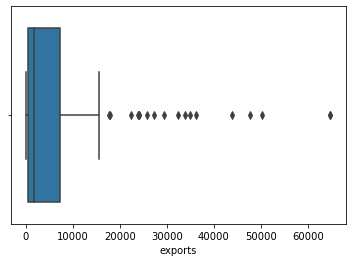

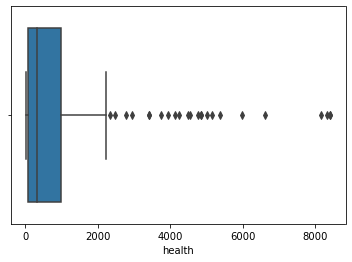

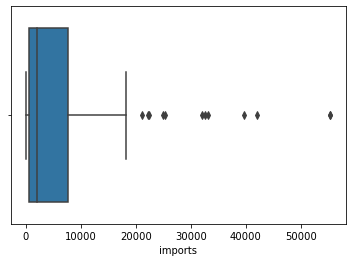

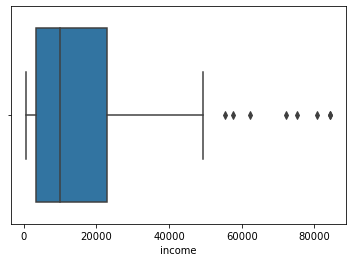

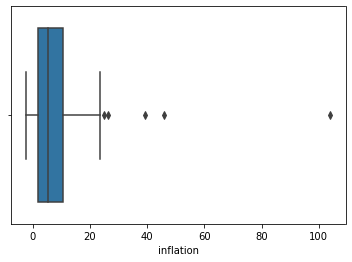

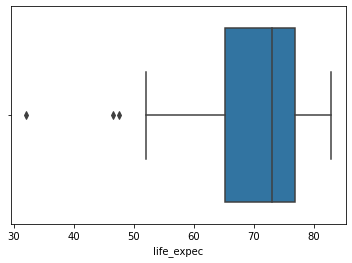

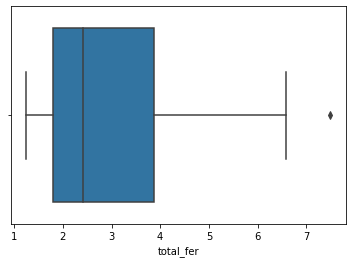

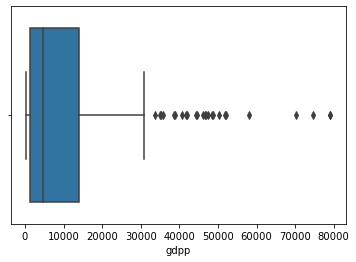

In [1023]:
for c in col:
    sns.boxplot(country_data[c])
    plt.show();

### 6. Hopkins Statistics:

In [1024]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1025]:
# T0 see how different is our data from the randomly scattered data:

hopkins(country_data.drop('country', axis=1))

0.8670552777897641

#### Inference: The more the dataset is different from the random distribution, it is better to perform clustering on the given dataset. Therefore, we can perform clustering on this dataset.

In [1026]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### 7. Scaling the data:

In [1027]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(country_data.drop('country', axis=1))
scaled_df

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09278484,
         1.62498101, -0.6500669 ]])

In [1028]:
type(scaled_df)

numpy.ndarray

In [1029]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619092,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.647866,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.670423,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179234,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.704258,-0.542634,-0.032042


In [1030]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [1031]:
scaled_df.columns=col
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619092,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.647866,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.670423,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179234,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.704258,-0.542634,-0.032042


### 8. Finding the optimal number of clusters
   - SSD/ Elbow Curve

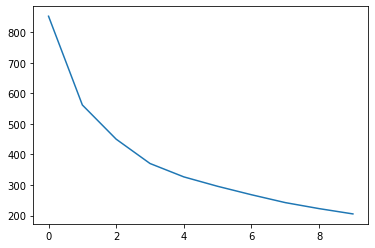

In [1032]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

#### Inference: According to the elbow curve, we can assume that the elbow is at 3 , that is the number of clusters should be 3.

###  9. Silhouette Analysis

In [1033]:
# silhouette analysis

a = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(scaled_df)
    a.append([k, silhouette_score(scaled_df, kmean.labels_)])

sil = pd.DataFrame(a)
sil

,0,1
0,2,0.478620
1,3,0.422637
2,4,0.408496
3,5,0.415147
4,6,0.303822
5,7,0.323428
6,8,0.284644
7,9,0.311167
8,10,0.288543


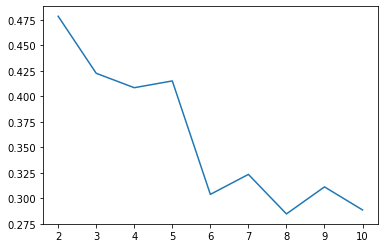

In [1034]:
plt.plot(sil[0], sil[1]);

#### Inference: Though the highest Silhouette score is at 2, but we take the next highest silhouette score that is 4. Therefore we take the number of clusters (k) = 4

### 10. K - means Clustering:
 - k=4

In [1035]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [1036]:
# to see the centroid values the algorithm generated for the final clusters
kmeans.cluster_centers_

array([[-0.4007705 , -0.3477249 , -0.37432605, -0.32776224, -0.30044547,
        -0.02700913,  0.26115828, -0.44759333, -0.39099425],
       [-0.84242305,  3.38505949,  2.51076791,  3.21669774,  2.37841226,
        -0.52549464,  1.1566476 , -0.77735174,  2.78938863],
       [ 1.32661556, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39088869, -1.27627565,  1.35458158, -0.62421756],
       [-0.80113665,  0.70733581,  1.08677385,  0.76844277,  1.24591255,
        -0.39574916,  0.99862468, -0.7405428 ,  1.20458285]])

In [1037]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [1038]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [1039]:
country_data['labels'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [1040]:
country_data['labels'].value_counts()

0    80
2    48
3    30
1     9
Name: labels, dtype: int64

### 11. Visualizing with Scatter plot:

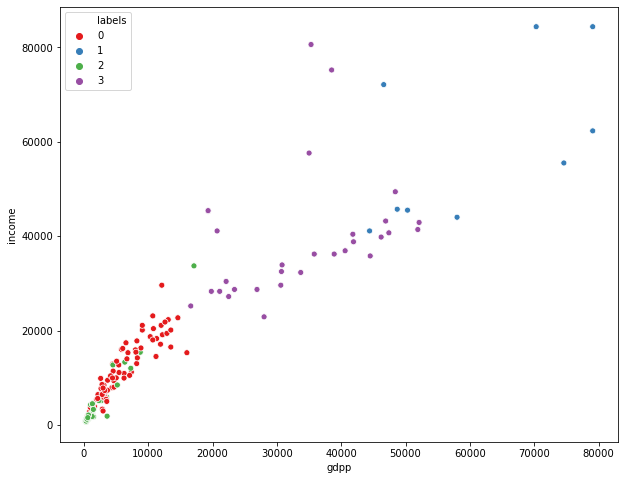

In [1041]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=country_data, palette='Set1')
plt.show()

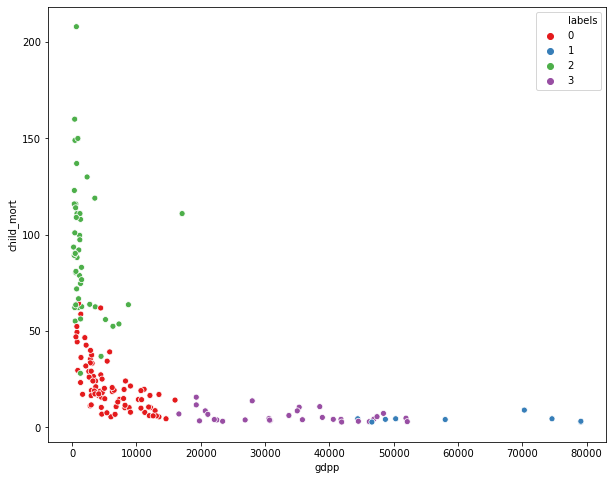

In [1042]:
plt.figure(figsize=[10,8])
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country_data, palette='Set1')
plt.show()

### 12. Cluster Profiling:

In [1043]:
country_data[['child_mort','income', 'gdpp','labels']].groupby('labels').mean()

,child_mort,income,gdpp
labels,,,
0,22.157500,11478.625000,5962.150000
1,4.400000,59438.666667,61230.666667
2,91.610417,3897.354167,1909.208333
3,6.060000,39163.333333,33690.000000


<Figure size 720x720 with 0 Axes>

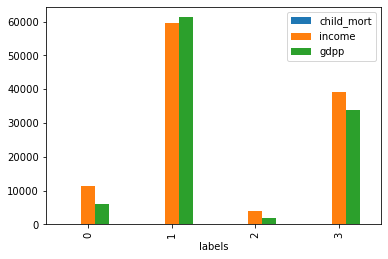

In [1044]:
plt.figure(figsize=[10,10])
country_data[['child_mort','income', 'gdpp','labels']].groupby('labels').mean().plot(kind= 'bar')
plt.show()

#### Inference: We need the cluster having low income, low gdpp and high child_mort. Therefore we select, cluster 2.

In [1045]:
c1 = country_data[country_data['labels']==2]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,2


In [1046]:
c1['labels'].value_counts()

2    48
Name: labels, dtype: int64

 - To find the countries which are in direst need of aid, we need to sort the dataframe c1 in descending order.

In [1047]:
c2=c1.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False])
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,2


### The countries which are in direst need of aid are listed below:

In [1048]:
c2=pd.DataFrame(c2[["country"]])
c2

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea


### 13. Clustering by Hierarchical Clustering

In [1049]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619092,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.647866,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.670423,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179234,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.704258,-0.542634,-0.032042


In [1050]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


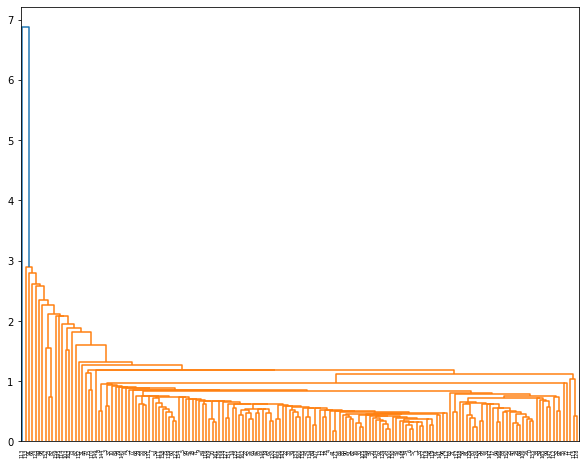

In [1051]:
# single linkage
plt.figure(figsize=[10,8])
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

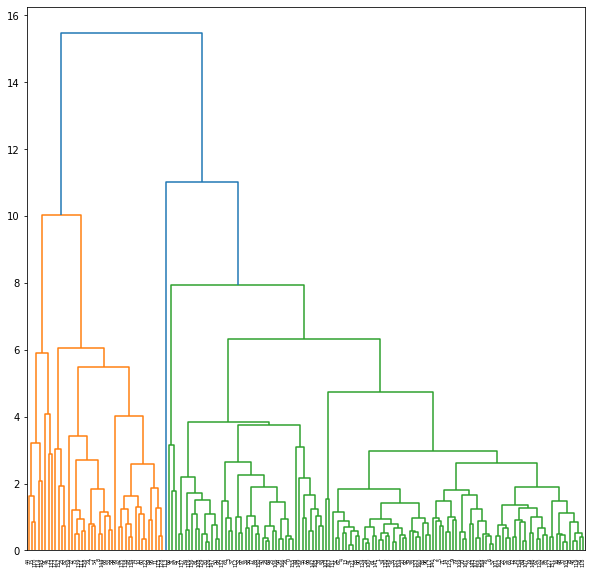

In [1052]:
# complete linkage
plt.figure(figsize=[10,10])
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [1053]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [1054]:
# assign cluster labels
country_data['cluster_labels'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [1055]:
country_data['cluster_labels'].value_counts()

0    80
2    48
3    30
1     9
Name: cluster_labels, dtype: int64

In [1056]:
country_data[['child_mort','income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean()

,child_mort,income,gdpp
cluster_labels,,,
0,22.157500,11478.625000,5962.150000
1,4.400000,59438.666667,61230.666667
2,91.610417,3897.354167,1909.208333
3,6.060000,39163.333333,33690.000000


<Figure size 1440x1440 with 0 Axes>

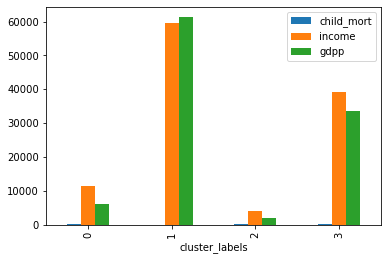

In [1057]:
plt.figure(figsize=[20,20])
country_data[['child_mort','income', 'gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind= 'bar')
plt.show()

#### We take cluster 2 because we need the countries with low income, low gdpp, but high child_mort, since those are the countries which are in direst need of aid.

In [1058]:
c3 = country_data[country_data['cluster_labels']==2]
c3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,2,2


In [1059]:
c3['cluster_labels'].value_counts()  ## there are 48 countries which are in direst need of aid

2    48
Name: cluster_labels, dtype: int64

 - We need to sort the dataframe in descending order to find the countries which are in direst need of aid.

In [1060]:
c4=c3.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False])
c4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,2,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,2,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,2,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.60,413.0,2,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,2,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,2,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.61,482.0,2,2


### According to Hierarchical Clustering, the countries which are in direst need of aid are:

In [1061]:
c4=pd.DataFrame(c4[["country"]])
c4

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea


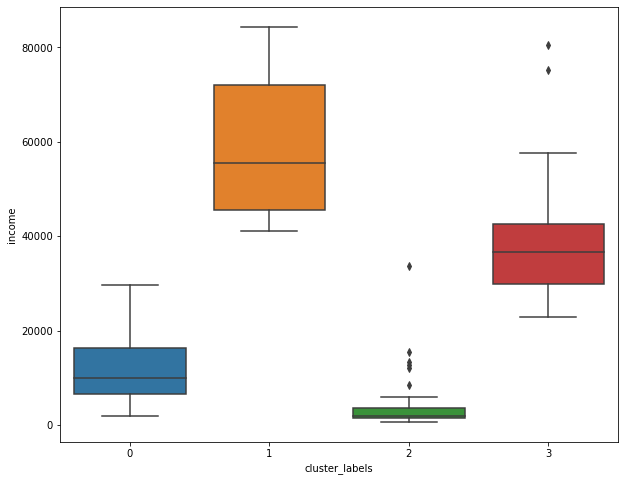

In [1062]:
# plotting between cluster_labels and income
plt.figure(figsize=[10,8])
sns.boxplot(x='cluster_labels', y='income', data=country_data)
plt.show()

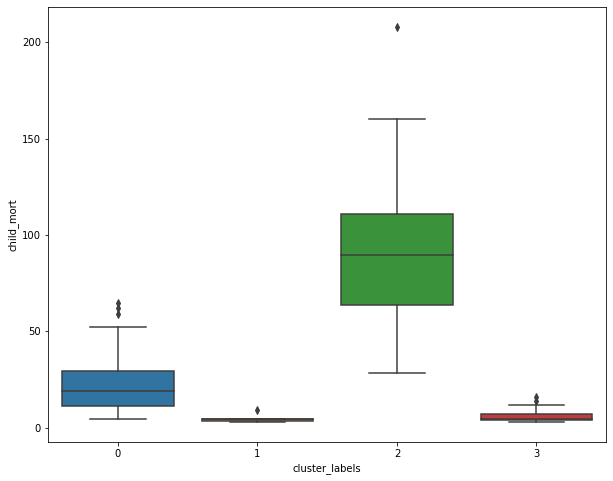

In [1063]:
# plotting between cluster_labels and child_mort
plt.figure(figsize=[10,8])
sns.boxplot(x='cluster_labels', y='child_mort', data=country_data)
plt.show()

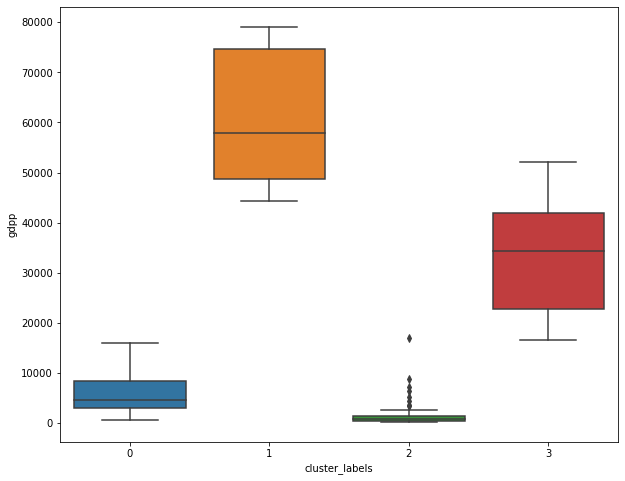

In [1064]:
# plotting between cluster_labels and gdpp
plt.figure(figsize=[10,8])
sns.boxplot(x='cluster_labels', y='gdpp', data=country_data)
plt.show()

### Inference: We are getting the same countries from both the types of clustering which are in direst need of aid.

#### Therefore, final list of countries that I think should be reported back to the CEO are:

In [1065]:
c4  ## 48 countries are in direst need of aid

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea
